In [34]:
import numpy as np
import matplotlib.pyplot as plt

from createData import createDataLinear, createDataCircular, createDataCircular2
from feedforward import FeedForwardNN, BCELoss

np.set_printoptions(precision = 4, suppress = True)

# This pipeline is a showcase of the feedforward neural network I implemented from scratch in the feedforward.py file

Data: [x, y, label]
 [[ 0.5882  0.148   1.    ]
 [ 0.8965 -0.7096  0.    ]
 [-0.1847  0.272   1.    ]
 [-0.3996  0.889   1.    ]
 [-0.5322  0.7974  1.    ]]


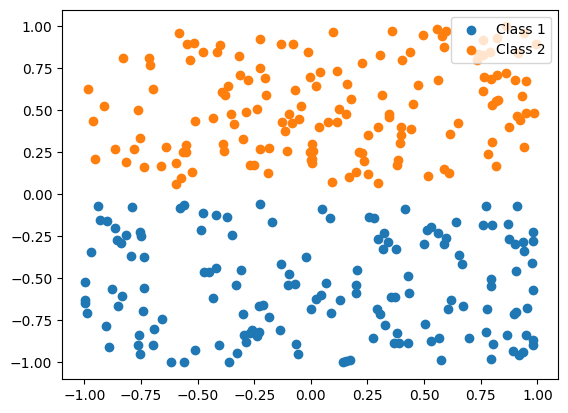

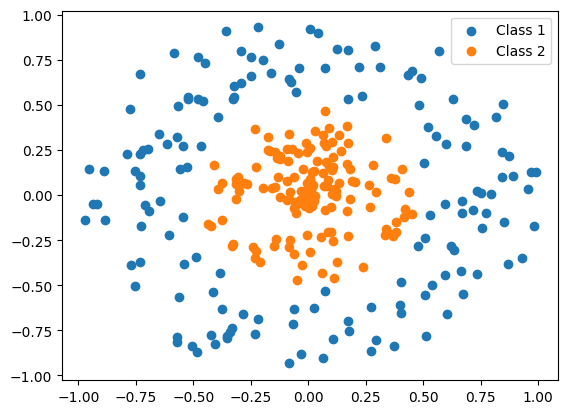

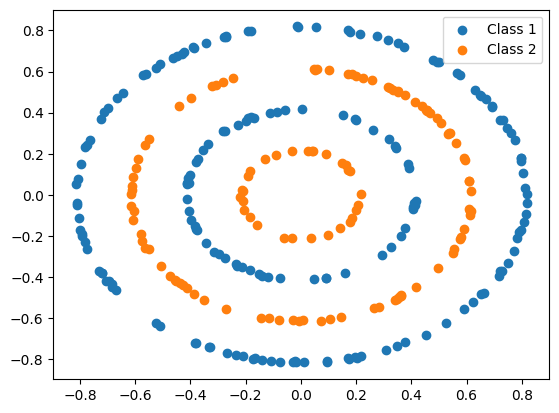

In [35]:
# linear seperable
data_linear = createDataLinear(150, 150)
print("Data: [x, y, label]\n", data_linear[0:5])

# divide into classes
class1_linear = data_linear[np.where(data_linear[:,2] == 0)]
class2_linear = data_linear[np.where(data_linear[:,2] == 1)]

plt.scatter(class1_linear[:,0], class1_linear[:,1], label="Class 1")
plt.scatter(class2_linear[:,0], class2_linear[:,1], label="Class 2")
plt.legend(loc="upper right")
plt.show()

# not linear seperable
data_circular = createDataCircular(150, 150)

# divide into classes
class1_circular = data_circular[np.where(data_circular[:,2] == 0)]
class2_circular = data_circular[np.where(data_circular[:,2] == 1)]

plt.scatter(class1_circular[:,0], class1_circular[:,1], label="Class 1")
plt.scatter(class2_circular[:,0], class2_circular[:,1], label="Class 2")
plt.legend(loc="upper right")
plt.show()

# hard data
data_hard = createDataCircular2(150, 150)

# divide into classes
class1_hard = data_hard[np.where(data_hard[:,2] == 0)]
class2_hard = data_hard[np.where(data_hard[:,2] == 1)]

plt.scatter(class1_hard[:,0], class1_hard[:,1], label="Class 1")
plt.scatter(class2_hard[:,0], class2_hard[:,1], label="Class 2")
plt.legend(loc="upper right")
plt.show()

### Create neural network

In [36]:
# First network, used on the linear data
nn_lin = FeedForwardNN(input_size = 2, output_size = 1, nr_layers = 2, hidden_units = [3, 3], activation = "tanh", output_activation = "sigmoid")
weights = nn_lin.weights()
print("First network weights, used on the linear data:")
for i in range(len(weights)):
    print(weights[i].shape)
    print(weights[i])

# Second network, used on the circular data
nn_circ = FeedForwardNN(input_size = 2, output_size = 1, nr_layers = 3, hidden_units = [10, 10, 10], activation = "relu", output_activation = "sigmoid")
weights = nn_circ.weights()

# third network, used on the hard data
nn_hard = FeedForwardNN(input_size = 2, output_size = 1, nr_layers = 5, hidden_units = [10, 10, 10, 10, 10], activation = "leaky_relu", output_activation = "sigmoid")
weights = nn_circ.weights()

First network weights, used on the linear data:
(3, 2)
[[-0.5317  0.0285]
 [-0.093   0.5032]
 [-0.1162  0.3422]]
(3, 3)
[[ 0.395   0.4897  0.2307]
 [ 0.558  -0.1278 -0.1436]
 [ 0.0396 -0.4534 -0.2577]]
(1, 3)
[[ 0.1661 -0.4865  0.317 ]]


### Quick forward call

In [37]:
input = data_linear[0][0:2]
target = data_linear[0][2]
print("Input:", input, "- Label:", data_linear[0][2])
output = nn_lin.forward(input)
print("Model output:", output[0])
loss = BCELoss(output[0], target)
print("BCEloss gives:", loss)

Input: [0.5882 0.148 ] - Label: 1.0
Model output: 0.5141624119287321
BCEloss gives: 0.6652160869219946


### Train network on the two classes

In [38]:
# FOR LINEAR DATA
nr_epochs = 20
learning_rate = 0.01
running_loss = 0
loss_linear = []

# training loop (stochastic gradient descent)
for epoch in range(nr_epochs):
    for i in range(data_linear.shape[0]):
        # input
        input = data_linear[i][0:2]
        label = data_linear[i][2]
        
        # forward
        output = nn_lin.forward(input)[0]
        # loss calc
        current_loss = BCELoss(output, label)
        # backprop
        nn_lin.backprop(input, output, label, "BCELoss")
        # take a step down the gradient, gradients are reset after
        nn_lin.step(learning_rate)

        # add loss to running loss
        running_loss += current_loss

    # calc loss, reset running loss
    loss_linear.append(running_loss / data_linear.shape[0])
    running_loss = 0

# FOR CIRCULAR DATA (gradient descent)
nr_epochs = 100
learning_rate = 0.005
running_loss = 0
loss_circular = []

# training loop
for epoch in range(nr_epochs):
    # break
    for j in range(data_circular.shape[0]):
        # input
        input = data_circular[j][0:2]
        label = data_circular[j][2]
        
        # forward
        output = nn_circ.forward(input)[0]
        # loss calc
        current_loss = BCELoss(output, label)
        # backprop
        nn_circ.backprop(input, output, label, "BCELoss")
        # take a step down the gradient, gradients are reset after
        nn_circ.step(learning_rate)
        
        # add loss to running loss
        running_loss += current_loss

    # calc loss, reset running loss
    loss_circular.append(running_loss / data_circular.shape[0])
    running_loss = 0


# FOR HARD DATA (gradient descent)
nr_epochs = 350
learning_rate = 0.005
running_loss = 0
loss_hard = []

# training loop
for epoch in range(nr_epochs):
    # break
    for j in range(data_hard.shape[0]):
        # input
        input = data_hard[j][0:2]
        label = data_hard[j][2]
        
        # forward
        output = nn_hard.forward(input)[0]
        # loss calc
        current_loss = BCELoss(output, label)
        # backprop
        nn_hard.backprop(input, output, label, "BCELoss")
        # take a step down the gradient, gradients are reset after
        nn_hard.step(learning_rate)
        
        # add loss to running loss
        running_loss += current_loss

    # calc loss, reset running loss
    loss_hard.append(running_loss / data_hard.shape[0])
    running_loss = 0

### Weights after training (first network only)


In [39]:
# First network, used on the linear data
weights = nn_lin.weights()
print("First network weights, used on the linear data:")
for i in range(len(weights)):
    print(weights[i].shape)
    print(weights[i])

First network weights, used on the linear data:
(3, 2)
[[-0.3461 -0.5456]
 [-0.0195  2.1179]
 [-0.0684  1.5968]]
(3, 3)
[[ 0.0626  1.5928  1.062 ]
 [ 0.7692 -1.4803 -1.1739]
 [ 0.1599 -0.8162 -0.5512]]
(1, 3)
[[ 2.2694 -2.5582 -1.0094]]


### Loss graphs

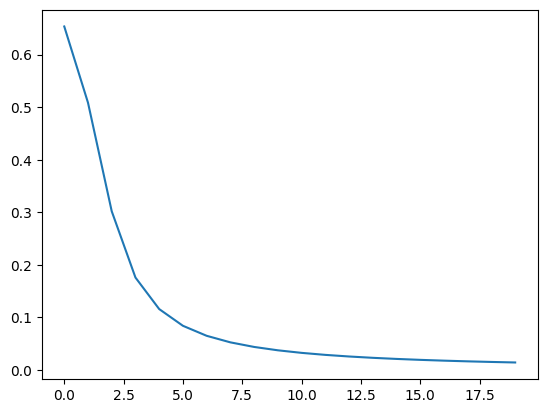

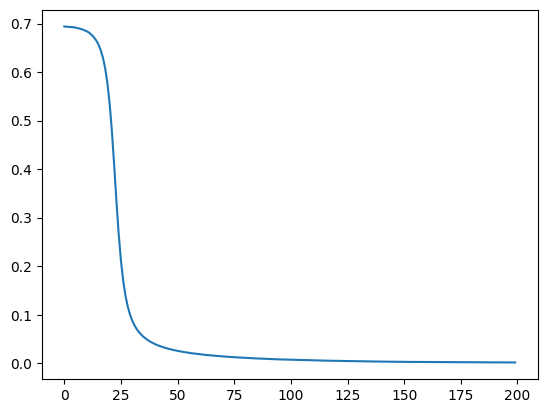

<function matplotlib.pyplot.show(close=None, block=None)>

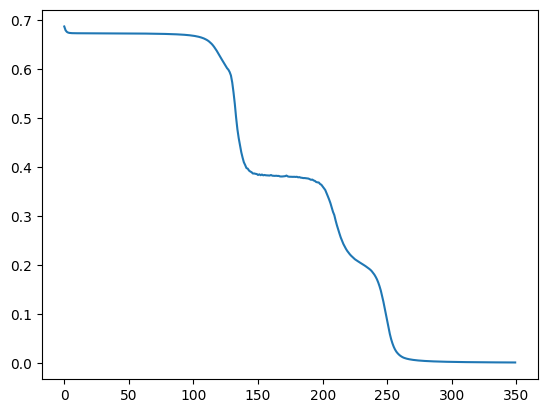

In [40]:
plt.plot(loss_linear)
plt.show()

plt.plot(loss_circular)
plt.show()

plt.plot(loss_hard)
plt.show

### Decision boundary

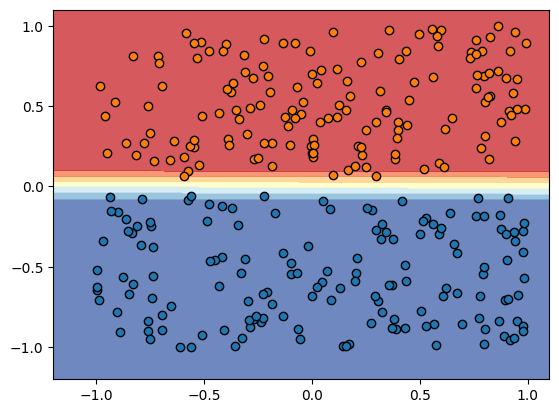

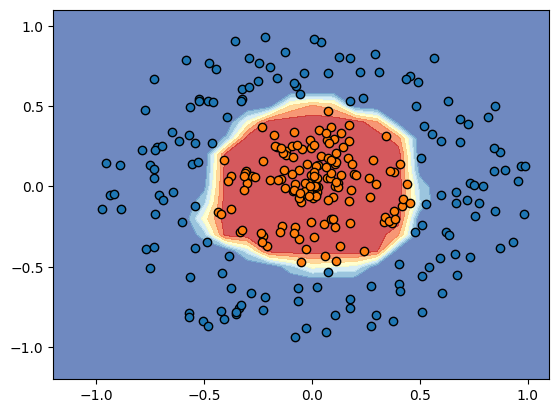

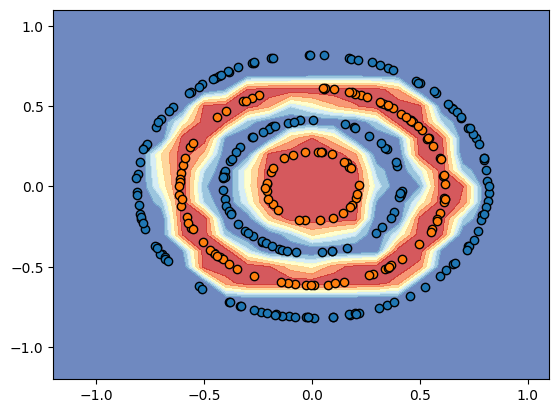

In [41]:
# define x and y scale
x1grid = np.arange(-1.2, 1.2, 0.1)
x2grid = np.arange(-1.2, 1.2, 0.1)

# create grid lines 
xx, yy = np.meshgrid(x1grid, x2grid)

# flatten each grid to a vector
r1, r2 = xx.flatten(), yy.flatten()
r1, r2 = r1.reshape((len(r1), 1)), r2.reshape((len(r2), 1))

# horizontal stack vectors to create x1,x2 input for the model
grid = np.hstack((r1,r2))

# make predictions for the grid
preds_lin = []
preds_circ = []
preds_hard = []
for i in range(grid.shape[0]):
    pred_lin = nn_lin.forward(grid[i]) 
    preds_lin.append(pred_lin)
    pred_circ = nn_circ.forward(grid[i]) 
    preds_circ.append(pred_circ)
    pred_hard = nn_hard.forward(grid[i]) 
    preds_hard.append(pred_hard)

# reshape the predictions back into a grid
preds_lin = np.array(preds_lin)
preds_circ = np.array(preds_circ)
preds_hard = np.array(preds_hard)
grid_lin = preds_lin.reshape(xx.shape)
grid_circ = preds_circ.reshape(xx.shape)
grid_hard = preds_hard.reshape(xx.shape)

# plot the grid of x, y and z values as a surface
plt.contourf(xx, yy, grid_lin, cmap='RdYlBu_r', alpha = 0.75)
plt.scatter(class1_linear[:,0], class1_linear[:,1], label="Class 1", edgecolors='black')
plt.scatter(class2_linear[:,0], class2_linear[:,1], label="Class 2", edgecolors='black')
plt.show()
plt.contourf(xx, yy, grid_circ, cmap='RdYlBu_r', alpha = 0.75)
plt.scatter(class1_circular[:,0], class1_circular[:,1], label="Class 1", edgecolors='black')
plt.scatter(class2_circular[:,0], class2_circular[:,1], label="Class 2", edgecolors='black')
plt.show()
plt.contourf(xx, yy, grid_hard, cmap='RdYlBu_r', alpha = 0.75)
plt.scatter(class1_hard[:,0], class1_hard[:,1], label="Class 1", edgecolors='black')
plt.scatter(class2_hard[:,0], class2_hard[:,1], label="Class 2", edgecolors='black')
plt.show()
